In [16]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/DavronbekSattorov/ThinkDSP/tree/master/code/thinkdsp.py

In [17]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/DavronbekSattorov/ThinkDSP/tree/master/code/180960__kleeb__gunshot.wavv

In [19]:
from thinkdsp import read_wave

wave = read_wave('180960__kleeb__gunshot.wav')
wave.normalize()
wave.make_audio()

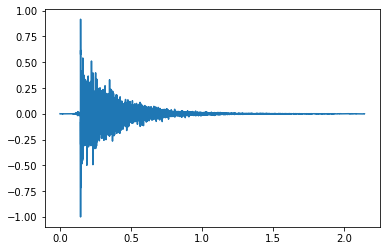

In [20]:
wave.plot()

In [22]:
segment = wave.segment(start=1.1, duration=1.3)
segment.make_audio()

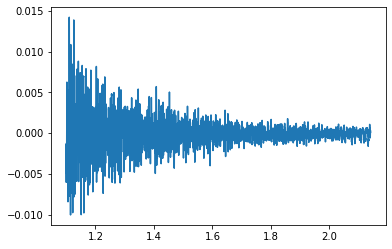

In [23]:
segment.plot()

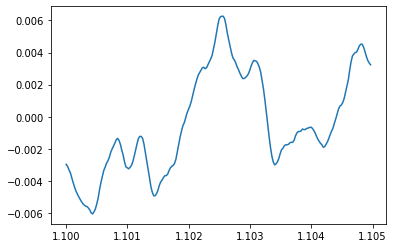

In [24]:
segment.segment(start=1.1, duration=0.005).plot()

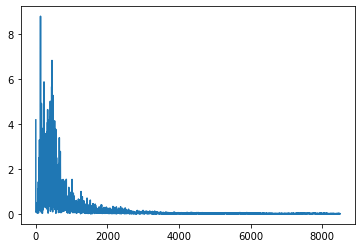

In [25]:
spectrum = segment.make_spectrum()
spectrum.plot(high=8500)

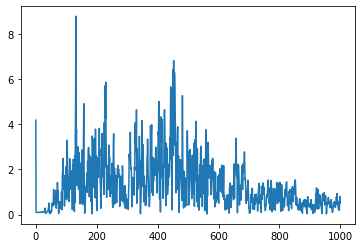

In [26]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

In [27]:
spectrum.peaks()[:30]

[(8.779477020888365, 131.66187238493723),
 (6.816431692288797, 452.64775104602506),
 (6.410805677544557, 449.76464435146437),
 (6.284024422387269, 455.5308577405857),
 (5.863356472983708, 229.68749999999997),
 (5.827012074551035, 453.6087866108786),
 (5.706326206307376, 227.76542887029285),
 (5.6510262806458424, 443.0373953974895),
 (5.611715928392767, 456.49189330543925),
 (5.260721159686711, 481.47881799163173),
 (5.003663719301561, 404.5959728033472),
 (4.969193656480706, 130.70083682008365),
 (4.96130538210356, 450.7256799163179),
 (4.905617142318953, 157.60983263598325),
 (4.639155036409043, 422.8556485355648),
 (4.633440057619677, 330.59623430962336),
 (4.629988653548298, 403.63493723849365),
 (4.526428959293032, 457.4529288702928),
 (4.52075181849288, 421.89461297071125),
 (4.325005050152933, 411.32322175732213),
 (4.249741306383858, 228.7264644351464),
 (4.225723992287266, 414.20632845188277),
 (4.183975816424517, 442.07635983263594),
 (4.177739799188207, 0.0),
 (4.167638136191

In [28]:
spectrum.low_pass(2000)

In [29]:
spectrum.make_wave().make_audio()

In [30]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [32]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), IntSlider(value=2, description='du…